# Density Estimation - Parametric Method

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from miniml.denestimation.parametric import *

## Classification

### Maximum Likelihood Estimation (MLE)
Consider estimated parameters as deterministic

**1 dimension**

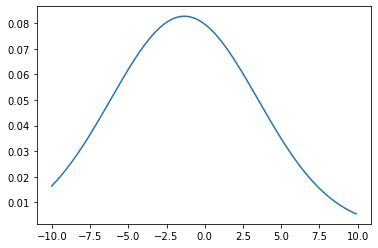

In [2]:
mle = MLE_c(np.array([[-6], [-8], [-3], [0], [4], [5]]))
mle.fit(distribution='Gaussian')

x = np.arange(-10, 10, 0.1)
_ = plt.plot(x, mle.predict(np.array(list(x)).reshape(-1,1)))

**2 dimension**

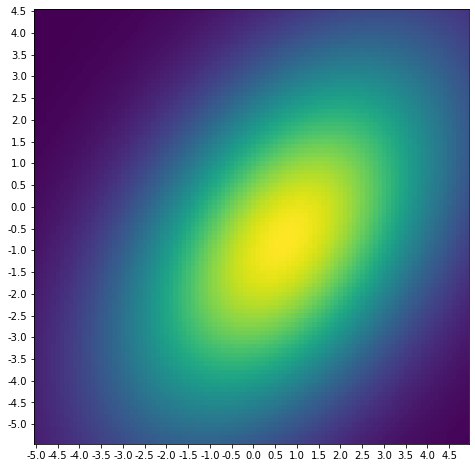

In [3]:
data = np.array([[-2, 2], [2, 2], [-3, -2.5], [3, -2.5], [-1, -3.25], [1, -3.25], [5, 5]])
mle = MLE_c(data)
mle.fit(distribution='Gaussian')

xmin, xmax = -5, 5
ymin, ymax = -5, 5
inc = 0.1

plt.figure(figsize=(8, 8))

(x, y) = np.meshgrid(np.arange(xmin, xmax, inc), np.arange(ymin, ymax, inc))
xy = np.hstack((x.reshape(x.shape[0]*x.shape[1], 1, order='F'), 
                y.reshape(y.shape[0]*y.shape[1], 1, order='F')))

len_x = int((xmax-xmin)/inc)
len_y = int((ymax-ymin)/inc)

plt.xticks(np.arange(0, len_x, 5), map(lambda x: round(x,1), np.arange(xmin, xmax, inc*5)))
plt.yticks(np.arange(0, len_y, 5)[::-1], map(lambda x: round(x,1), np.arange(ymin, ymax, inc*5)))
_ = plt.imshow(np.rot90(mle.predict(xy).reshape(len_x, len_y)))

### Maximum A Posterior (MAP) —— prior is needed
Consider estimated parameters as random

## Regression

### Maximum Likelihood Estimation (MLE)
Consider estimated parameters as deterministic

**Linear case**

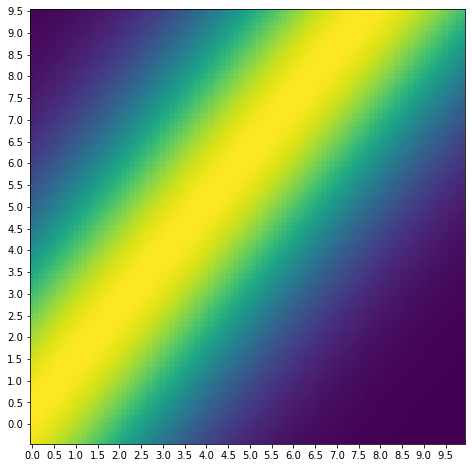

In [4]:
data = np.array([[1, i] for i in range(1, 11)])
data_y = np.array([random.uniform(0.5,2)*i+random.uniform(-2,2) for i in range(1, 11)])

mle = MLE_r(data, data_y)
mle.fit(distribution='Gaussian')

xmin, xmax = 0, 10
ymin, ymax = 0, 10
inc = 0.1

plt.figure(figsize=(8, 8))

(x, y) = np.meshgrid(np.arange(xmin, xmax, inc), np.arange(ymin, ymax, inc))
xy = np.hstack((x.reshape(x.shape[0]*x.shape[1], 1, order='F'), 
                y.reshape(y.shape[0]*y.shape[1], 1, order='F')))

len_x = int((xmax-xmin)/inc)
len_y = int((ymax-ymin)/inc)

# augmented notation
x = np.insert(xy[:,0].reshape(-1,1), 0, [1 for _ in range(len(xy))], axis=1)
y = xy[:,1]

plt.xticks(np.arange(0, len_x, 5), map(lambda x: round(x,1), np.arange(xmin, xmax, inc*5)))
plt.yticks(np.arange(0, len_y, 5)[::-1], map(lambda x: round(x,1), np.arange(ymin, ymax, inc*5)))
_ = plt.imshow(np.rot90(mle.predict(x, y).reshape(len_x, len_y)))

**Nonlinear Case**

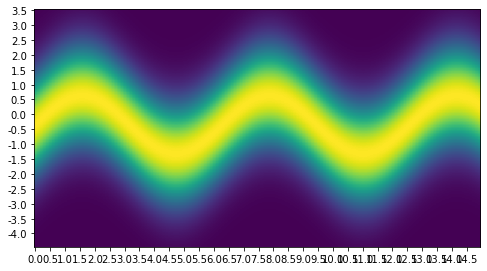

In [5]:
N = 10
data = np.reshape(np.arange(0, N, 0.2), (-1, 1))
data = np.insert(data, 0, [1 for _ in range(len(data))], axis=1) # augmented notation
data_y = [np.sin(per[1])+random.uniform(-2,2) for per in data]

mle = MLE_r(data, data_y)
mle.fit(distribution='Gaussian', kernel='sin')

xmin, xmax = 0, 15
ymin, ymax = -4, 4
inc = 0.1

plt.figure(figsize=(8, 8))

(x, y) = np.meshgrid(np.arange(xmin, xmax, inc), np.arange(ymin, ymax, inc))
xy = np.hstack((x.reshape(x.shape[0]*x.shape[1], 1, order='F'), 
                y.reshape(y.shape[0]*y.shape[1], 1, order='F')))

len_x = int((xmax-xmin)/inc)
len_y = int((ymax-ymin)/inc)

# augmented notation
x = np.insert(xy[:,0].reshape(-1,1), 0, [1 for _ in range(len(xy))], axis=1)
y = xy[:,1]

plt.xticks(np.arange(0, len_x, 5), map(lambda x: round(x,1), np.arange(xmin, xmax, inc*5)))
plt.yticks(np.arange(0, len_y, 5)[::-1], map(lambda x: round(x,1), np.arange(ymin, ymax, inc*5)))
_ = plt.imshow(np.rot90(mle.predict(x, y).reshape(len_x, len_y)))

### Maximum A Posterior (MAP) —— prior is needed
Consider estimated parameters as random

### Bayesian Regression —— prior is needed
Estimated parameters are also random, but integrate over estimated parameters instead of choosing a specific value